타이타닉 생존 예측 - Tree

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\/bin/'

In [13]:
df = pd.read_csv('titanic.csv')

In [14]:
df = df.set_index('Name')

In [15]:
df.columns = ['Surived', 'Pclass', 'Sex', 'Age', 'Siblings',
             'Parents', 'Fare']

In [16]:
df.Surived.mean() # 전체 생존률(평균)

0.3855693348365276

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

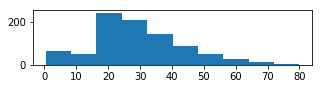

In [25]:
plt.figure(figsize=(5,1))
plt.hist(df['Age'].values) #나이에 따른 분포

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 487.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

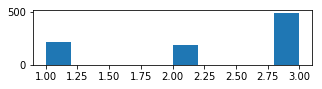

In [27]:
plt.figure(figsize=(5,1))
plt.hist(df['Pclass'].values) #좌석에 따른 분포

In [31]:
s = df['Sex']


In [35]:
s.value_counts()

male      573
female    314
Name: Sex, dtype: int64

(array([604., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

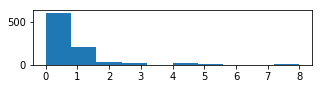

In [37]:
plt.figure(figsize=(5,1))
plt.hist(df['Siblings'].values) # 형제 자매 배우자( 혼자 탔는지 )

(array([ 24.,  18., 140., 146.,  74.,  59.,  42.,  18.,  17.,   7.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <a list of 10 Patch objects>)

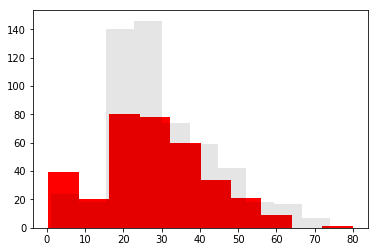

In [45]:
plt.hist(df[df['Surived']==1]['Age'].values, color='red' ) # 생존
plt.hist(df[df['Surived']==0]['Age'].values,  color='black', alpha=0.1) # 사망

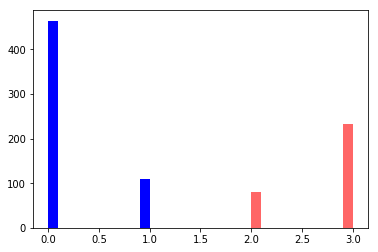

In [55]:
p = plt.hist(df[df['Sex']=='male']['Surived'].values, color='blue' ) # 생존
p = plt.hist(df[df['Sex']=='female']['Surived'].values+2,  color='red', alpha=0.6) # 사망

In [60]:
df.dtypes # Pclass 범주 이므로 object 로 변경

Surived       int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [61]:
df['Pclass'] = df['Pclass'].astype('object')

In [64]:
data = pd.get_dummies(df)

In [65]:
data.head()

,Surived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [77]:
# X, Y 나누기
X = data.drop(columns='Surived')
y = data['Surived']

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X, y)

In [79]:
model.score(X, y)

0.8489289740698985

In [ ]:
#Sex_

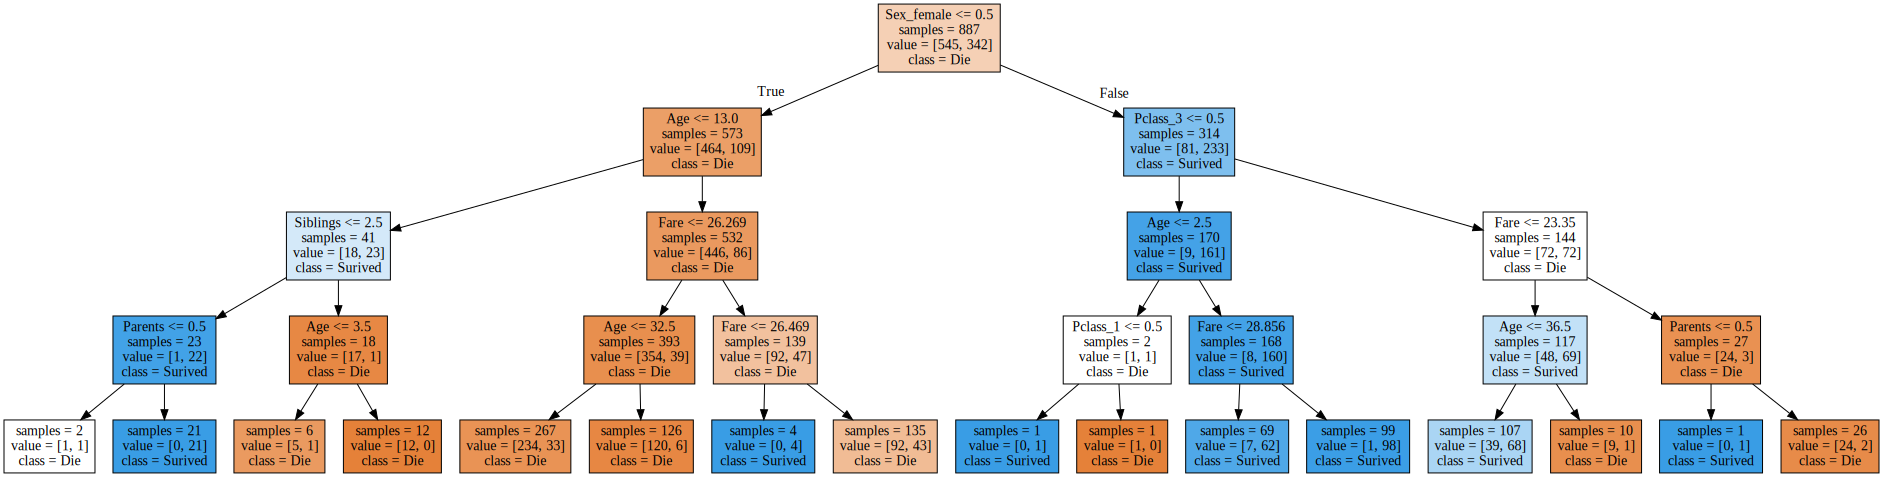

In [87]:
# 트리 그림 그리기(파일로 트리를 저장합니다.)
export_graphviz(model, out_file = 'titanic.dot', class_names=['Die', 'Surived'], 
               feature_names=X.columns, impurity=False, filled=True)

with open('titanic.dot') as f:
    dot_graph = f.read()
g = display(graphviz.Source(dot_graph))
#display(g)
# 트리는 남에게 설명하기 좋음